In [1]:
import json, csv, os, ast
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import scipy as sp
from IPython.display import display, HTML
import xml.etree.ElementTree
import seaborn as sns
import pylab as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(6,4)

import matplotlib
#matplotlib.rcParams['pdf.fonttype'] = 42
#matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
# Funzioni

# Calcolo Frequenze Relative
def compute_relatives(table):
    tot = table['occurr'].sum()
    table['occurr'] = table.apply(lambda row: round(row.occurr / tot, 2), axis = 1)
    return table

# Funzione per Estrapolare il Dominio
def find_domain(url):
    st = url.split("/")
    return st[2]


In [3]:
df6 = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')
df100 = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')
df100 = df100.dropna()
#print(df6.shape[0])
#print(df100.shape[0])
#verify_s6 = df6.groupby(['unit_id']).count().reset_index()
#verify_s6 = verify_s6.sort_values(by='doc_id')
#verify_s6 = verify_s6[["doc_id", "unit_id"]]
#display(verify_s6.head())
#verify_s100 = df100.groupby(['unit_id']).count().reset_index()
#verify_s100 = verify_s100[["doc_id", "unit_id"]]
#verify_s100 = verify_s100.sort_values(by='doc_id')
#print(verify_s100.min())
#display(verify_s100.head())
#for row in verify_s100.iterrows():
#        print(row)

In [4]:
# Pilot 1 | S100
#df = pd.read_csv('../../Task/Pilot/Parsed-results.csv')
# Pilot 2 | S100
#df = pd.read_csv('../../Task/Pilot2/Parsed-results.csv')
# Pilot 2 | S6
#df = pd.read_csv('../../Task/Pilot2/Parsed-results_S6.csv')
# Task | S100
#df = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')
# Task | S6
#df = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')
#df.head(2)

In [24]:
sns.set_context("paper", rc={"font.size":4,"axes.titlesize":6,"axes.labelsize":6})
sns.set_context("paper")

<h3>Age </3>

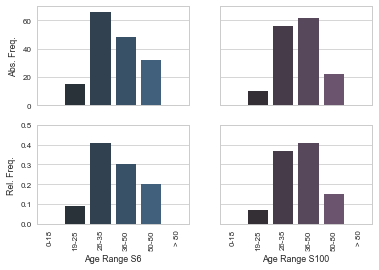

In [25]:
df_age6 = df6[['age', 'worker_id']]
df_age6 = df_age6.drop_duplicates()
df_age6 = df_age6.groupby(['age']).count().reset_index()
# TEMPORANEA
df_age6 = df_age6.append({'age': 1, 'worker_id': 0}, ignore_index=True)
df_age6 = df_age6.append({'age': 6, 'worker_id': 0}, ignore_index=True)
#df_age6 = compute_relatives(df_age6)
df_age6 = df_age6[df_age6.age != -1]
df_age6.columns = ['age', 'occurr']
df_age100 = df100[['age', 'worker_id']]
df_age100 = df_age100.drop_duplicates()
df_age100 = df_age100.groupby(['age']).count().reset_index()
# TEMPORANEA
df_age100 = df_age100.append({'age': 1, 'worker_id': 0}, ignore_index=True)
df_age100 = df_age100.append({'age': 6, 'worker_id': 0}, ignore_index=True)
#df_age100 = compute_relatives(df_age100)
df_age100 = df_age100[df_age100.age != -1]
df_age100.columns = ['age', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_age.pdf"
pages = PdfPages(name)

f, axes = plt.subplots(2, 2)
#f.suptitle("Età dei partecipanti per le due scale")
ax1 = sns.barplot(x = df_age6['age'], y = df_age6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_age100['age'], y = df_age100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_age6 = compute_relatives(df_age6)
df_age100 = compute_relatives(df_age100)
ax3 = sns.barplot(x = df_age6['age'], y = df_age6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_age100['age'], y = df_age100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 70))
ax2.set(ylim=(0, 70))
ax3.set(ylim=(0, .5))
ax4.set(ylim=(0, .5))
ax3.set_xticklabels(['0-18', '19-25', '26-35', '36-50', '50-80', '> 80'], rotation = 90)
ax4.set_xticklabels(['0-18', '19-25', '26-35', '36-50', '50-80', '> 80'], rotation = 90)
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'Age Range S6')
ax4.set(title = "", ylabel = '', xlabel = 'Age Range S100')
pages.savefig(bbox_inches='tight');pages.close()

<h3>Sex</h3>

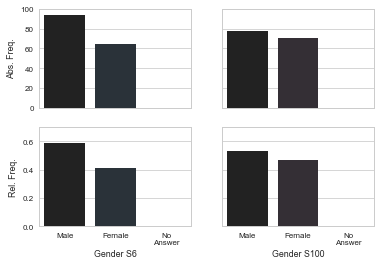

In [26]:
df_gender6 = df6[['gender', 'worker_id']]
df_gender6 = df_gender6.drop_duplicates()
df_gender6 = df_gender6.groupby(['gender']).count().reset_index()
# TEMPORANEA
df_gender6 = df_gender6.append({'gender': 3, 'worker_id': 0}, ignore_index=True)
#df_age6 = compute_relatives(df_age6)
df_gender6 = df_gender6[df_gender6.gender != -1]
df_gender6.columns = ['gender', 'occurr']
df_gender100 = df100[['gender', 'worker_id']]
df_gender100 = df_gender100.drop_duplicates()
df_gender100 = df_gender100.groupby(['gender']).count().reset_index()
# TEMPORANEA
df_gender100 = df_gender100.append({'gender': 3, 'worker_id': 0}, ignore_index=True)
#df_age100 = compute_relatives(df_age100)
df_gender100 = df_gender100[df_gender100.gender != -1]
df_gender100.columns = ['gender', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_gender.pdf"
pages = PdfPages(name)

f, axes = plt.subplots(2, 2)
#f.suptitle("Sesso dei partecipanti per le due scale")
ax1 = sns.barplot(x = df_gender6['gender'], y = df_gender6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_gender100['gender'], y = df_gender100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_gender6 = compute_relatives(df_gender6)
df_gender100 = compute_relatives(df_gender100)
ax3 = sns.barplot(x = df_gender6['gender'], y = df_gender6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_gender100['gender'], y = df_gender100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 100))
ax2.set(ylim=(0, 100))
ax3.set(ylim=(0, .7))
ax4.set(ylim=(0, .7))
ax3.set_xticklabels(['Male', 'Female', 'No\nAnswer'])
ax4.set_xticklabels(['Male', 'Female', 'No\nAnswer'])
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'Gender S6')
ax4.set(title = "", ylabel = '', xlabel = 'Gender S100')
pages.savefig(bbox_inches='tight');pages.close()

<h3>School</h3>

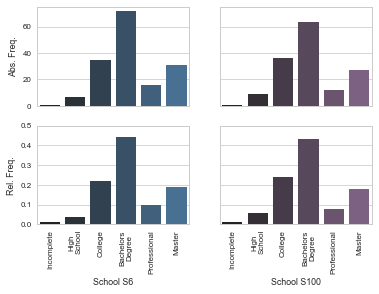

In [30]:
df_school6 = df6[['school', 'worker_id']]
df_school6 = df_school6.drop_duplicates()
df_school6 = df_school6.groupby(['school']).count().reset_index()
df_school6 = df_school6[df_school6.school != -1]
df_school6.columns = ['school', 'occurr']
df_school100 = df100[['school', 'worker_id']]
df_school100 = df_school100.drop_duplicates()
df_school100 = df_school100.groupby(['school']).count().reset_index()
df_school100 = df_school100[df_school100.school != -1]
df_school100.columns = ['school', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_school.pdf"
pages = PdfPages(name)

f, axes = plt.subplots(2, 2)
#f.suptitle("Livello di Istruzione dei partecipanti per le due scale")
ax1 = sns.barplot(x = df_school6['school'], y = df_school6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_school100['school'], y = df_school100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_gender6 = compute_relatives(df_school6)
df_gender100 = compute_relatives(df_school100)
ax3 = sns.barplot(x = df_school6['school'], y = df_school6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_school100['school'], y = df_school100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 75))
ax2.set(ylim=(0, 75))
ax3.set(ylim=(0, .5))
ax4.set(ylim=(0, .5))
ax3.set_xticklabels(['Incomplete', 'High\nSchool', 'College', 'Bachelors\nDegree', 'Professional', 'Master'], rotation = 90)
ax4.set_xticklabels(['Incomplete', 'High\nSchool', 'College', 'Bachelors\nDegree', 'Professional', 'Master'], rotation = 90)
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'School S6')
ax4.set(title = "", ylabel = '', xlabel = 'School S100')
pages.savefig(bbox_inches='tight');pages.close()

<h3>Income</h3>

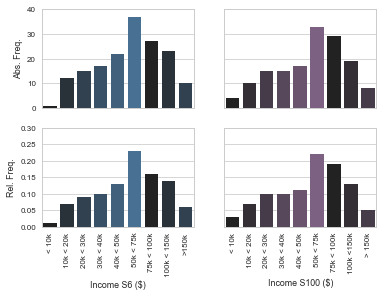

In [44]:
df_income6 = df6[['income', 'worker_id']]
df_income6 = df_income6.drop_duplicates()
df_income6 = df_income6.groupby(['income']).count().reset_index()
df_income6 = df_income6[df_income6.income != -1]
df_income6.columns = ['income', 'occurr']
df_income100 = df100[['income', 'worker_id']]
df_income100 = df_income100.drop_duplicates()
df_income100 = df_income100.groupby(['income']).count().reset_index()
df_income100 = df_income100[df_income100.income != -1]
df_income100.columns = ['income', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_income.pdf"
pages = PdfPages(name)

f, axes = plt.subplots(2, 2)
#f.suptitle("Stipendio dei partecipanti per le due scale")
ax1 = sns.barplot(x = df_income6['income'], y = df_income6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_income100['income'], y = df_income100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_income6 = compute_relatives(df_income6)
df_income100 = compute_relatives(df_income100)
ax3 = sns.barplot(x = df_income6['income'], y = df_income6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_income100['income'], y = df_income100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 40))
ax2.set(ylim=(0, 40))
ax3.set(ylim=(0, .3))
ax4.set(ylim=(0, .3))
ax3.set_xticklabels(['< 10k', '10k < 20k', '20k < 30k', '30k < 40k',
                    '40k < 50k', '50k < 75k', '75k < 100k', 
                    '100k < 150k', '>150k'], rotation = 90)
ax4.set_xticklabels(['< 10k', '10k < 20k', '20k < 30k', '30k < 40k',
                    '40k < 50k', '50k < 75k', '75k < 100k', 
                    '100k <150k', '> 150k'], rotation = 90)
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'Income S6 ($)')
ax4.set(title = "", ylabel = '', xlabel = 'Income S100 ($)')
pages.savefig(bbox_inches='tight');pages.close()

<h3>Party</h3>

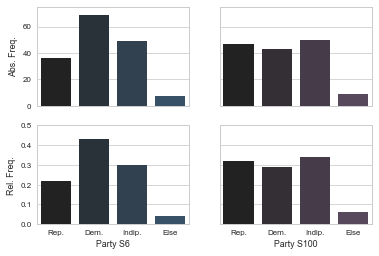

In [45]:
df_party6 = df6[['party', 'worker_id']]
df_party6 = df_party6.drop_duplicates()
df_party6 = df_party6.groupby(['party']).count().reset_index()
df_party6 = df_party6[df_party6.party != -1]
df_party6.columns = ['party', 'occurr']
df_party100 = df100[['party', 'worker_id']]
df_party100 = df_party100.drop_duplicates()
df_party100 = df_party100.groupby(['party']).count().reset_index()
df_party100 = df_party100[df_party100.party != -1]
df_party100.columns = ['party', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_party.pdf"
pages = PdfPages(name)

f, axes = plt.subplots(2, 2)
#f.suptitle("Preferenze Politiche dei partecipanti per le due scale")
ax1 = sns.barplot(x = df_party6['party'], y = df_party6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_party100['party'], y = df_party100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_gender6 = compute_relatives(df_party6)
df_gender100 = compute_relatives(df_party100)
ax3 = sns.barplot(x = df_party6['party'], y = df_party6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_party100['party'], y = df_party100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 75))
ax2.set(ylim=(0, 75))
ax3.set(ylim=(0, .5))
ax4.set(ylim=(0, .5))
ax3.set_xticklabels(['Rep.', 'Dem.', 'Indip.', 'Else'])
ax4.set_xticklabels(['Rep.', 'Dem.', 'Indip.', 'Else'])
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'Party S6')
ax4.set(title = "", ylabel = '', xlabel = 'Party S100')
pages.savefig(bbox_inches='tight');pages.close()

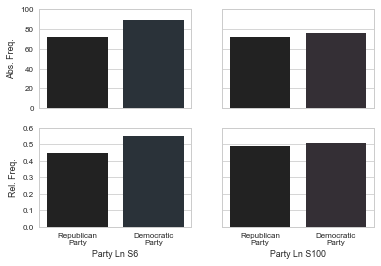

In [46]:
df_party_ln6 = df6[['party_ln', 'worker_id']]
df_party_ln6 = df_party_ln6.drop_duplicates()
df_party_ln6 = df_party_ln6.groupby(['party_ln']).count().reset_index()
df_party_ln6 = df_party_ln6[df_party_ln6.party_ln != -1]
df_party_ln6.columns = ['party_ln', 'occurr']
df_party_ln100 = df100[['party_ln', 'worker_id']]
df_party_ln100 = df_party_ln100.drop_duplicates()
df_party_ln100 = df_party_ln100.groupby(['party_ln']).count().reset_index()
df_party_ln100 = df_party_ln100[df_party_ln100.party_ln != -1]
df_party_ln100.columns = ['party_ln', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_party_ln.pdf"
pages = PdfPages(name)
f, axes = plt.subplots(2, 2)
#f.suptitle("Party Alignment per le due scale")
ax1 = sns.barplot(x = df_party_ln6['party_ln'], y = df_party_ln6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_party_ln100['party_ln'], y = df_party_ln100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_party_ln6 = compute_relatives(df_party_ln6)
df_party_ln100 = compute_relatives(df_party_ln100)
ax3 = sns.barplot(x = df_party_ln6['party_ln'], y = df_party_ln6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_party_ln100['party_ln'], y = df_party_ln100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 100))
ax2.set(ylim=(0, 100))
ax3.set(ylim=(0, .6))
ax4.set(ylim=(0, .6))
ax3.set_xticklabels(['Republican\nParty', 'Democratic\nParty'])
ax4.set_xticklabels(['Republican\nParty', 'Democratic\nParty'])
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'Party Ln S6')
ax4.set(title = "", ylabel = '', xlabel = 'Party Ln S100')
pages.savefig(bbox_inches='tight');pages.close()

<h3>Ideo</h3>

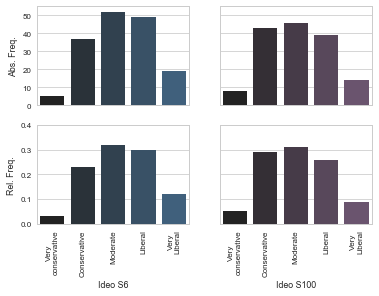

In [47]:
df_ideo6 = df6[['ideo', 'worker_id']]
df_ideo6 = df_ideo6.drop_duplicates()
df_ideo6 = df_ideo6.groupby(['ideo']).count().reset_index()
df_ideo6 = df_ideo6[df_ideo6.ideo != -1]
df_ideo6.columns = ['ideo', 'occurr']
df_ideo100 = df100[['ideo', 'worker_id']]
df_ideo100 = df_ideo100.drop_duplicates()
df_ideo100 = df_ideo100.groupby(['ideo']).count().reset_index()
df_ideo100 = df_ideo100[df_ideo100.ideo != -1]
df_ideo100.columns = ['ideo', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_ideo.pdf"
pages = PdfPages(name)
f, axes = plt.subplots(2, 2)
#f.suptitle("Ideological Alignment per le due scale")
ax1 = sns.barplot(x = df_ideo6['ideo'], y = df_ideo6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_ideo100['ideo'], y = df_ideo100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_ideo6 = compute_relatives(df_ideo6)
df_ideo100 = compute_relatives(df_ideo100)
ax3 = sns.barplot(x = df_ideo6['ideo'], y = df_ideo6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_ideo100['ideo'], y = df_ideo100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 55))
ax2.set(ylim=(0, 55))
ax3.set(ylim=(0, .4))
ax4.set(ylim=(0, .4))
ax3.set_xticklabels(['Very\nconservative', 'Conservative', 'Moderate', 'Liberal', 'Very\nLiberal'], rotation = 90)
ax4.set_xticklabels(['Very\nconservative', 'Conservative', 'Moderate', 'Liberal', 'Very\nLiberal'], rotation = 90)
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'Ideo S6')
ax4.set(title = "", ylabel = '', xlabel = 'Ideo S100')
pages.savefig(bbox_inches='tight');pages.close()

<h3>Last Elections</h3>

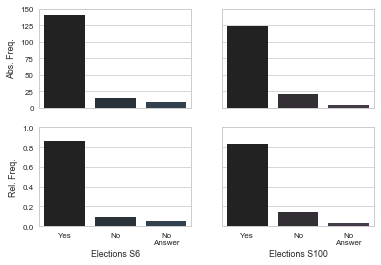

In [48]:
df_elections6 = df6[['elections', 'worker_id']]
df_elections6 = df_elections6.drop_duplicates()
df_elections6 = df_elections6.groupby(['elections']).count().reset_index()
df_elections6 = df_elections6[df_elections6.elections != -1]
df_elections6.columns = ['elections', 'occurr']
df_elections100 = df100[['elections', 'worker_id']]
df_elections100 = df_elections100.drop_duplicates()
df_elections100 = df_elections100.groupby(['elections']).count().reset_index()
df_elections100 = df_elections100[df_elections100.elections != -1]
df_elections100.columns = ['elections', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_elections.pdf"
pages = PdfPages(name)
f, axes = plt.subplots(2, 2)
#f.suptitle("Partecipazione Elezioni 2016 per le due scale")
ax1 = sns.barplot(x = df_elections6['elections'], y = df_elections6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_elections100['elections'], y = df_elections100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_elections6 = compute_relatives(df_elections6)
df_elections100 = compute_relatives(df_elections100)
ax3 = sns.barplot(x = df_elections6['elections'], y = df_elections6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_elections100['elections'], y = df_elections100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 150))
ax2.set(ylim=(0, 150))
ax3.set(ylim=(0, 1))
ax4.set(ylim=(0, 1))
ax3.set_xticklabels(['Yes', 'No', 'No\nAnswer'])
ax4.set_xticklabels(['Yes', 'No', 'No\nAnswer'])
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'Elections S6')
ax4.set(title = "", ylabel = '', xlabel = 'Elections S100')
pages.savefig(bbox_inches='tight');pages.close()

<h3>Tea Party</h3>

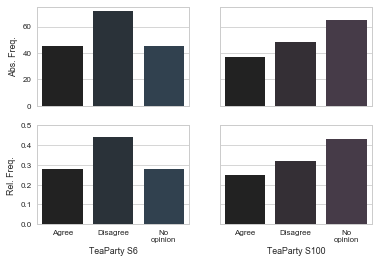

In [49]:
df_tea6 = df6[['teaparty', 'worker_id']]
df_tea6 = df_tea6.drop_duplicates()
df_tea6 = df_tea6.groupby(['teaparty']).count().reset_index()
df_tea6 = df_tea6[df_tea6.teaparty != -1]
df_tea6.columns = ['teaparty', 'occurr']
df_tea100 = df100[['teaparty', 'worker_id']]
df_tea100 = df_tea100.drop_duplicates()
df_tea100 = df_tea100.groupby(['teaparty']).count().reset_index()
df_tea100 = df_tea100[df_tea100.teaparty != -1]
df_tea100.columns = ['teaparty', 'occurr']

name = "../../plots/BigTask/New Demo/partecipants_tea.pdf"
pages = PdfPages(name)
f, axes = plt.subplots(2, 2)
#f.suptitle("Tea Party Opinion per le due scale")
ax1 = sns.barplot(x = df_tea6['teaparty'], y = df_tea6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_tea100['teaparty'], y = df_tea100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
df_tea6 = compute_relatives(df_tea6)
df_tea100 = compute_relatives(df_tea100)
ax3 = sns.barplot(x = df_tea6['teaparty'], y = df_tea6['occurr'], palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_tea100['teaparty'], y = df_tea100['occurr'], palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 75))
ax2.set(ylim=(0, 75))
ax3.set(ylim=(0, .5))
ax4.set(ylim=(0, .5))
ax3.set_xticklabels(['Agree', 'Disagree', 'No\nopinion'])
ax4.set_xticklabels(['Agree', 'Disagree', 'No\nopinion'])
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'TeaParty S6')
ax4.set(title = "", ylabel = '', xlabel = 'TeaParty S100')
pages.savefig(bbox_inches='tight');pages.close()

<h3>Fonte Principale</h3>

In [50]:
# Calcolo Frequenze Relative
def compute_relatives(table):
    tot = table['worker_id'].sum()
    table['worker_id'] = table.apply(lambda row: round(row.worker_id / tot, 3), axis = 1)
    return table

# Funzione per Estrapolare il Dominio
def find_domain(url):
    st = url.split("/")
    s = st[2].splilt(".")
    return s[1]
df6 = pd.read_csv('../../Task/Pilot2/Parsed-results_S6.csv')
df100 = pd.read_csv('../../Task/Pilot2/Parsed-results_S100.csv')

gold_dict = ['LOW', 'HIGH']
df100 = df100[df100["rel"].isin(gold_dict) == False]
print(df100.shape[0])
my_df = df100[['doc_id', 'worker_id', 'url']]
# URLs Rotte per S100
my_df['url'][80] = "http://www.fakeURL.com"
my_df['url'][373] = "http://www.fakeURL.com"
# Prendo i domini
my_df['url'] = my_df.apply(lambda row: find_domain(row.url), axis = 1)

# Conto i totali
df_url_tot = my_df.groupby(['url']).count().reset_index()

df_url_tot.url = df_url_tot.url.apply(lambda x: 'www.youtube.com' if 'www.youtube.com › watch' in x else x)
df_url_tot.url = df_url_tot.url.apply(lambda x: 'twitter.com' if 'twitter.com › govwalker › status' in x else x)
df_url_tot.url = df_url_tot.url.apply(lambda x: 'en.wikipedia.org' if 'en.wikipedia.org › wiki › Yes_We_Can' in x else x)
df_url_tot.url = df_url_tot.url.apply(lambda x: 'en.wikipedia.org' if 'en.m.wikipedia.org' in x else x)


df_url_tot = compute_relatives(df_url_tot)
df_url_tot = df_url_tot.sort_values(by=['worker_id'], ascending=False)
display(df_url_tot.head())

#name = "../../plots/BigTask/Demographic/most_used_urls_S100_no_gold.pdf"
#df_url_tot['url'].to_csv("../../Task/BigTask/S100_URLs.csv", index=False, header=True)

#pages = PdfPages(name)
ax = sns.barplot(x = df_url_tot.head()['url'], y = df_url_tot.head()['worker_id'], palette = sns.dark_palette("muted purple", input="xkcd"))
ax.set_xticklabels(df_url_tot.head()['url'], rotation = 90)
ax.set(title = "Most Used Urls | S100 Scale | No Gold", ylabel = 'Occurrences', xlabel = 'Urls')
plt.yticks(np.arange(0, 1, step = 0.2))
#pages.savefig(bbox_inches='tight');pages.close()

FileNotFoundError: File b'../../Task/Pilot2/Parsed-results_S100.csv' does not exist

,unit_id,doc_id,rel,worker_id,gender,age,school,income,party,party_ln,ideo,elections,teaparty,position_in_task,S6_rel,justification,url,off_page_count,ip_address,time
0,unit_0,REP_LIE_doc6,LIE,AFBS8D6KBKKKY,2,3,4,3,2,2,4,1,3,1,1,"After implementation of the law, 98% of Massac...",https://en.wikipedia.org/wiki/Massachusetts_he...,0,65.35.157.98,105.615
1,unit_0,DEM_FALSE_doc1,FALSE,AFBS8D6KBKKKY,2,3,4,3,2,2,4,1,3,2,1,She has literally cited him in the past.,https://twitchy.com/2014/11/13/jonathan-who-na...,3,65.35.157.98,133.090
2,unit_0,LOW,LOW,AFBS8D6KBKKKY,2,3,4,3,2,2,4,1,3,3,2,Lincoln was assassinated in1865. Organized foo...,https://en.wikipedia.org/wiki/Formula_One,1,65.35.157.98,232.598
3,unit_0,DEM_HALFTRUE_doc3,HALFTRUE,AFBS8D6KBKKKY,2,3,4,3,2,2,4,1,3,4,4,"It was found by IFC that yes, water rates did ...",https://www.politifact.com/global-news/stateme...,6,65.35.157.98,152.994
4,unit_0,DEM_TRUE_doc2,TRUE,AFBS8D6KBKKKY,2,3,4,3,2,2,4,1,3,5,2,Ryan sounds like he really does regret ever su...,https://www.vanityfair.com/news/2019/07/paul-r...,3,65.35.157.98,122.103


,unit_id,doc,expert,worker_id,gender,age,school,income,party,party_ln,ideo,elections,teaparty,position_in_task,judgments,justification,url,off_page_count,time
0,unit_0,REP_LIE_doc3,LIE,A3KU7DD8Q1NQ7P,1,5,3,1,3,1,2,1,1,1,100,The article on the Politifact website seems to...,https://www.politifact.com/oregon/statements/2...,0,190.349
1,unit_0,DEM_TRUE_doc2,TRUE,A3KU7DD8Q1NQ7P,1,5,3,1,3,1,2,1,1,2,90,Link to Politifact backs up statement put forth.,https://www.politifact.com/personalities/hilla...,2,150.180
2,unit_0,HIGH,HIGH,A3KU7DD8Q1NQ7P,1,5,3,1,3,1,2,1,1,3,95,Youtube video of speech made verifies statement.,https://www.youtube.com/watch?v=Fe751kMBwms,1,78.892
3,unit_0,LOW,LOW,A3KU7DD8Q1NQ7P,1,5,3,1,3,1,2,1,1,4,0,Common knowledge football was not a sport unti...,http://mentalfloss.com/article/84081/he-became...,1,129.607
4,unit_0,DEM_HALFTRUE_doc2,HALFTRUE,A3KU7DD8Q1NQ7P,1,5,3,1,3,1,2,1,1,5,91,Several web search results attribute this stat...,https://wusfnews.wusf.usf.edu/post/fact-checki...,1,97.492


c:\users\barbe\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\barbe\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,url,doc,worker_id
35,www.politifact.com,96,0.500
6,en.wikipedia.org,18,0.094
26,www.google.com,17,0.089
10,mentalfloss.com,8,0.042
40,www.sportingnews.com,4,0.021


,url,doc_id,worker_id
146,www.politifact.com,887,0.554
21,en.wikipedia.org,256,0.160
115,www.google.com,38,0.024
181,www.youtube.com,29,0.018
172,www.washingtonpost.com,21,0.013


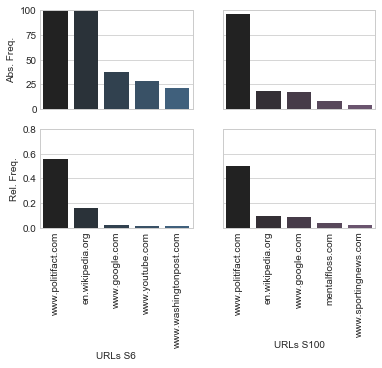

In [7]:
# Calcolo Frequenze Relative
def compute_relatives(table):
    tot = table['worker_id'].sum()
    table['worker_id'] = table.apply(lambda row: round(row.worker_id / tot, 3), axis = 1)
    return table
# Funzione per Estrapolare il Dominio
def find_domain(url):
    st = url.split("/")
    s = st[2].split(".")
    return st[2]
df6 = pd.read_csv('../../Task/Pilot2/Parsed-results_S6.csv')
df100 = pd.read_csv('../../Task/Pilot2/Parsed-results.csv')
display(df6.head())
display(df100.head())
#assert False
gold_dict = ['LOW', 'HIGH']
#df100 = df100[df100["rel"].isin(gold_dict) == False]
my_df_100 = df100[['doc', 'worker_id', 'url']]
#my_df_100['url'][80] = "http://www.fakeURL.com"
#my_df_100['url'][373] = "http://www.fakeURL.com"
# Prendo i domini
my_df_100['url'] = my_df_100.apply(lambda row: find_domain(row.url), axis = 1)

#df6 = df6[df6["rel"].isin(gold_dict) == False]
my_df_6 = df6[['doc_id', 'worker_id', 'url']]
# Prendo i domini
my_df_6['url'] = my_df_6.apply(lambda row: find_domain(row.url), axis = 1)

# Conto i totali
df_url_tot6 = my_df_6.groupby(['url']).count().reset_index()
df_url_tot100 = my_df_100.groupby(['url']).count().reset_index()
#df_url_tot6.url = df_url_tot6.url.apply(lambda x: 'www.youtube.com' if 'www.youtube.com › watch' in x else x)
#df_url_tot6.url = df_url_tot6.url.apply(lambda x: 'twitter.com' if 'twitter.com › govwalker › status' in x else x)
#df_url_tot6.url = df_url_tot6.url.apply(lambda x: 'en.wikipedia.org' if 'en.wikipedia.org › wiki › Yes_We_Can' in x else x)
#df_url_tot6.url = df_url_tot6.url.apply(lambda x: 'en.wikipedia.org' if 'en.m.wikipedia.org' in x else x)
df_url_tot100 = df_url_tot100.sort_values(by=['worker_id'], ascending=False)
df_url_tot6 = df_url_tot6.sort_values(by=['worker_id'], ascending=False)

df_url_tot6 = compute_relatives(df_url_tot6)
df_url_tot100 = compute_relatives(df_url_tot100)
display(df_url_tot100.head())
display(df_url_tot6.head())

name = "../../plots/BigTask/New Demo/partecipants_urls_gold_pilot.pdf"
pages = PdfPages(name)
f, axes = plt.subplots(2, 2)
#f.suptitle("Urls per le due scale | Gold")
ax1 = sns.barplot(x = df_url_tot6['url'].head(), y = df_url_tot6['doc_id'].head(), palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[0, 0])
ax2 = sns.barplot(x = df_url_tot100['url'].head(), y = df_url_tot100['doc'].head(), palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[0, 1])
ax3 = sns.barplot(x = df_url_tot6['url'].head(), y = df_url_tot6['worker_id'].head(), palette = sns.dark_palette("muted blue", input = "xkcd"), ax=axes[1, 0])
ax4 = sns.barplot(x = df_url_tot100['url'].head(), y = df_url_tot100['worker_id'].head(), palette = sns.dark_palette("muted purple", input = "xkcd"), ax=axes[1, 1])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels(df_url_tot6.head()['url'], rotation = 90)
ax4.set_xticklabels(df_url_tot100.head()['url'], rotation = 90)
ax4.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set(ylim=(0, 100))
ax2.set(ylim=(0, 100))
ax3.set(ylim=(0, .8))
ax4.set(ylim=(0, .8))
ax1.set(title = "", ylabel = 'Abs. Freq.', xlabel = '')
ax2.set(title = "", ylabel = '', xlabel = '')
ax3.set(title = "", ylabel = 'Rel. Freq.', xlabel = 'URLs S6')
ax4.set(title = "", ylabel = '', xlabel = 'URLs S100')
pages.savefig(bbox_inches='tight');pages.close()

In [20]:
df6 = pd.read_csv('../../Task/BigTask/Not_Poli_S6.csv')
df100 = pd.read_csv('../../Task/BigTask/Not_Poli_S100.csv')
gold_dict = ['LOW', 'HIGH']
df100 = df100[df100["rel"].isin(gold_dict) == False]
df6 = df6[df6["rel"].isin(gold_dict) == False]
print(df100.shape[0])
print(df6.shape[0])

330
318
